In [1]:
from hide_imports import *
df = pd.DataFrame(rts)
df = pd.DataFrame(rts)
ga_outad = {}
ga_outiz = {}
ga_outgl = {}

NGEN = 10
MU = 10
#for key,v in rts.items():

for key,v in rts.items():

    backend = str('GLIF')
    filename = str(key)+backend+str('.p')
    local_tests = [value for value in v.values() ]

    mp = model_params.MODEL_PARAMS['GLIF']
    mp = { k:v for k,v in mp.items() if type(v) is not dict }
    mp = { k:v for k,v in mp.items() if v is not None }
    try:
        ga_outgl[key] = pickle.load(open(filename,'rb'))
    except:
        ga_outgl[key], DO = om.run_ga(mp ,NGEN, local_tests, free_params = mp, NSGA = True, MU = MU, model_type = str('GLIF'))#,seed_pop=seeds[key])
        d2 = [p.dtc for p in ga_outgl[key]['pf'][0:-1] if not p.dtc.rheobase is None]
        pickle.dump(ga_outgl[key],open(filename,'wb'))

    backend = str('RAW')
    filename = str(key)+backend+str('.p')
    try:
        #assert 1 ==2
        ga_outiz[key]  = pickle.load(open(filename,'rb'))
    except:
        ga_outiz[key], DO = om.run_ga(model_params.MODEL_PARAMS['RAW'],NGEN, local_tests, free_params = model_params.MODEL_PARAMS['RAW'],
                                        NSGA = True, MU = MU, model_type = str('RAW'))
        pickle.dump(ga_outiz[key],open(filename,'wb'))
        dtcpop = [ ind.dtc for ind in ga_outiz[key]['pf'] ]
        filename = str(key)+backend+str('.p')
        d1 = [p.dtc for p in ga_outiz[key]['pf'][0:-1]]
    backend = str('BAE1')
    filename = str(key)+backend+str('.p')
    try:

        ga_outad[key]  = pickle.load(open(filename,'rb'))
    except:
        pass
    


WARNING    /usr/local/lib/python3.5/dist-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
 [py.warnings]
  data = yaml.load(f.read()) or {}



consider installing pynn a heavier backend


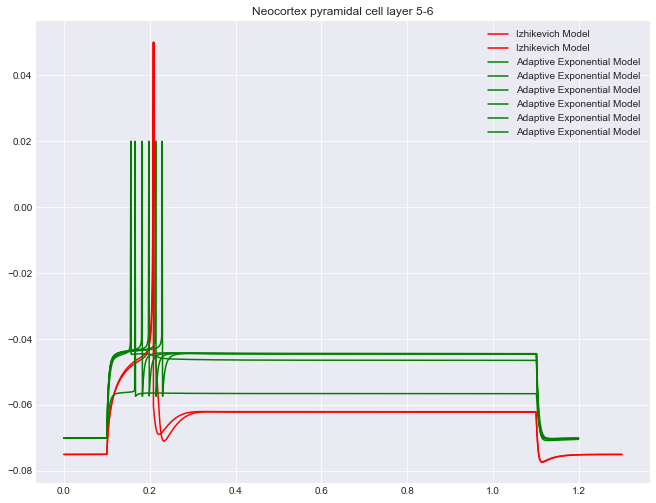

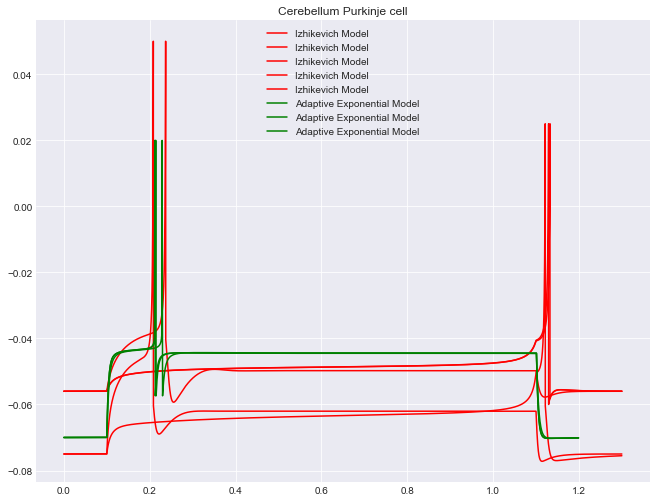

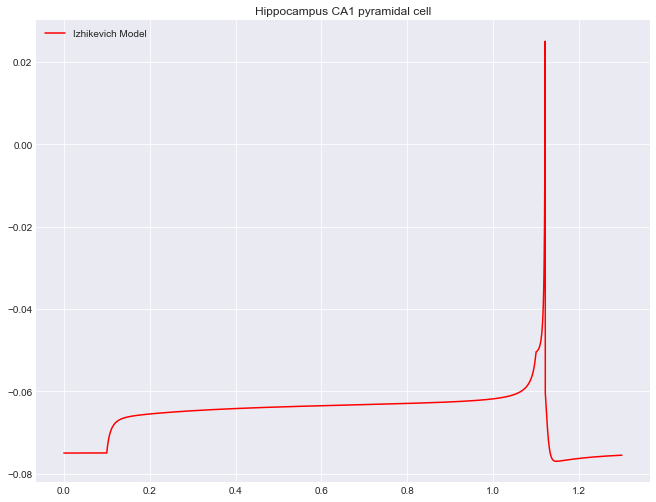

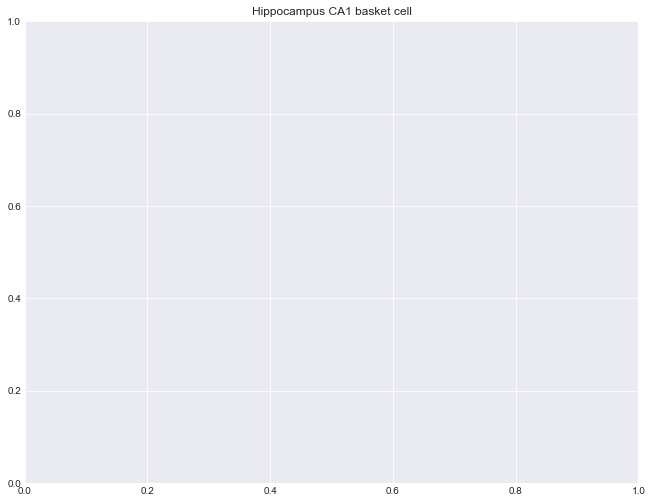

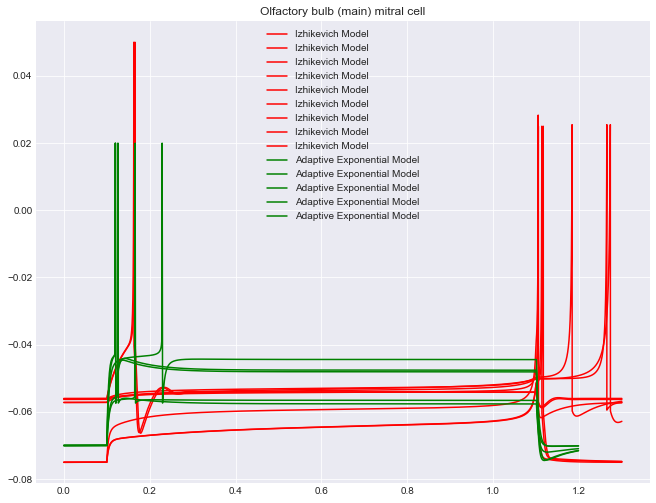

In [2]:
from neuronunit.optimisation.optimisation_management import inject_and_plot
    
for key,v in rts.items():
    try:
        d3 = [p.dtc for p in ga_outad[key]['pf'][0:-1]]
    except:
        pass
    d1 = [p.dtc for p in ga_outiz[key]['pf'][0:-1]]
    d2 = [p.dtc for p in ga_outgl[key]['pf'][0:-1] if not p.dtc.rheobase is None]
    inject_and_plot(d1,second_pop=d2,third_pop=d3,figname=str(key))
    


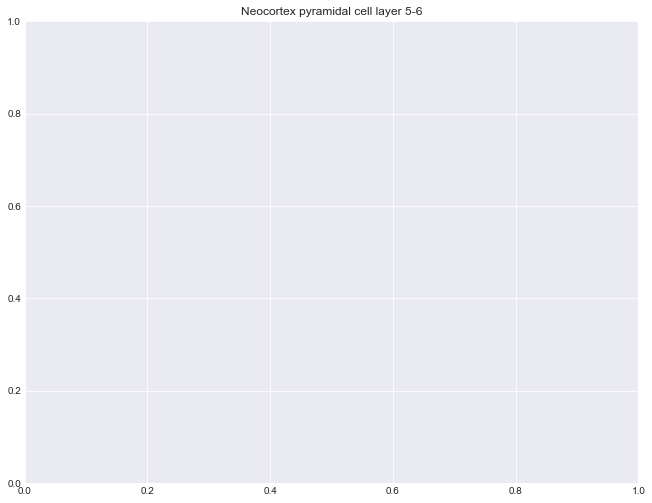

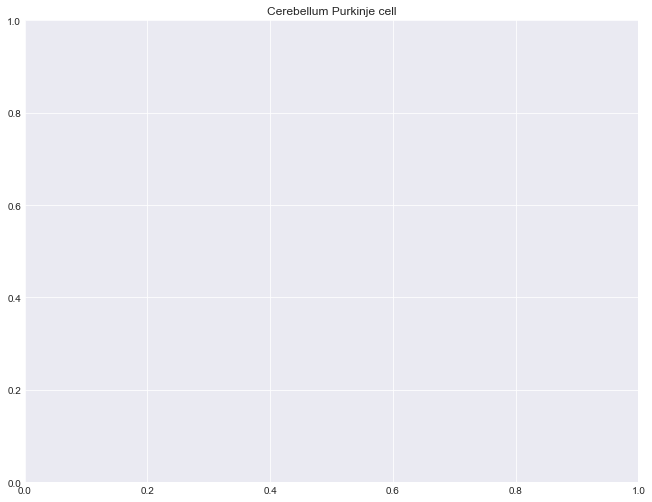

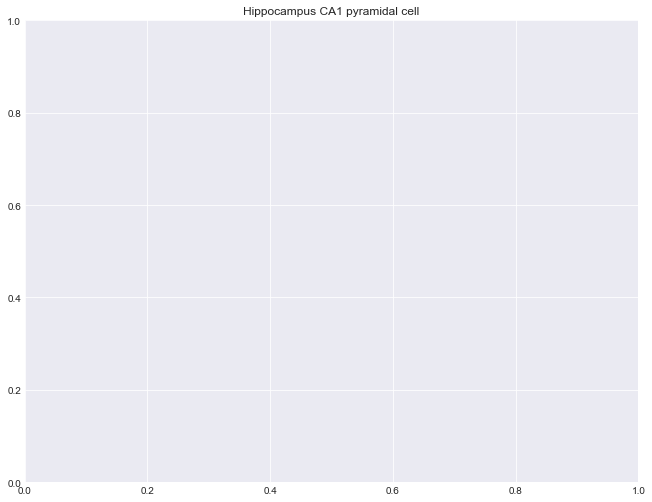

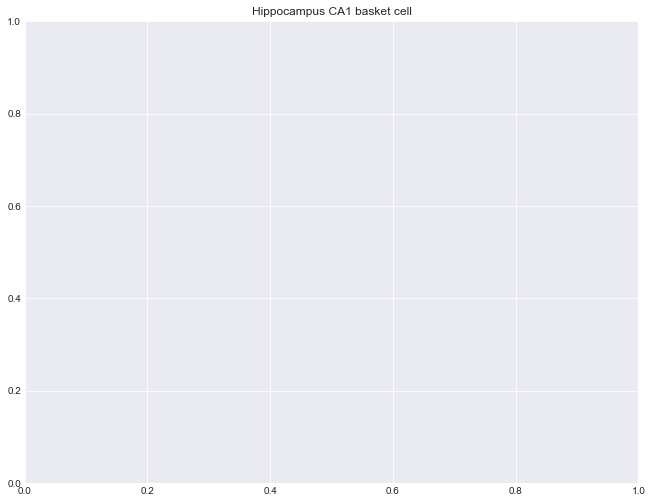

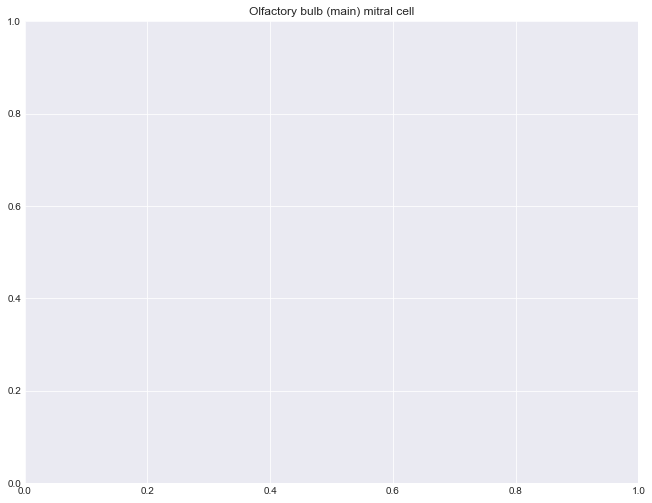

In [3]:

for key,v in rts.items():

    backend = str('GLIF')
    filename = str(key)+backend+str('.p')
    local_tests = [value for value in v.values() ]

    mp = model_params.MODEL_PARAMS['GLIF']
    mp = { k:v for k,v in mp.items() if type(v) is not dict }
    mp = { k:v for k,v in mp.items() if v is not None }
    #try:
    ga_outgl[key] = pickle.load(open(filename,'rb'))
    #except:
    #    ga_outgl[key], DO = om.run_ga(mp ,NGEN, local_tests, free_params = mp, NSGA = True, MU = MU, model_type = str('GLIF'))#,seed_pop=seeds[key])
    d2 = [p.dtc for p in ga_outgl[key]['pf'][0:-1] if not p.dtc.rheobase is None]
    #    pickle.dump(ga_outgl[key],open(filename,'wb'))
    inject_and_plot(d2,second_pop=d2,third_pop=d2,figname=str(key))
    